# 서울시 자전거(따릉이) 대여량 예측

<img src="https://image.ajunews.com/content/image/2020/04/08/20200408134351509387.jpg" align="left" alt="drawing" width="350"/>

## 데이터 설명
#### 파일 구조
- train.csv
    - 학습을 위하여 활용되는 데이터 셋입니다.
- test.csv
    - 테스트를 위하여 제공되는 데이터 셋입니다.
- submission.csv
    - 예측한 대여량을 submission 파일에 작성한 후 제출합니다.

#### 데이터 구조 설명
- hour: 시간
- temperature: 기온
- precipitation: 비가 오지 않았으면 0, 비가 오면 1
- windspeed: 평균 풍속
- humidity: 습도
- visibility: 기상 상태에 따른 가시성
- ozone: 오존 지수
- pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5: 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- **count: 서울시 자전거(따릉이) 대여량**

In [1]:
!pip install --upgrade mySUNI -q

import mySUNI
print(f'mySUNI 패키지 버전: {mySUNI.__version__}')

mySUNI 패키지 버전: 1.2.7


## 필요한 모듈 import 

In [2]:
from mySUNI import cds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

DATA_DIR = 'data/따릉이 대여량 예측'

# 경고 무시
warnings.filterwarnings('ignore')

## 프로젝트 셋업

In [3]:
cds.download_project('따릉이 대여량 예측', 
                     # 본인의 차수를 입력합니다.
                     'X차수 X반',
                     # 본인의 sk.com 이메일을 기입합니다.
                     '~~~@sk.com'
                    )


프로젝트: 따릉이 대여량 예측
파일 목록

test.csv
- data/따릉이 대여량 예측/test.csv

submission.csv
- data/따릉이 대여량 예측/submission.csv

train.csv
- data/따릉이 대여량 예측/train.csv



## 데이터 로드

- **train**: 분석에 필요한 데이터. 정답 label인 **count**가 포함된 데이터
- **test**:  예측에 활요할 데이터. 정답 label인 **count**가 포함되어 있지 않다.

In [4]:
# 코드를 입력해 주세요
# train.csv 파일을 읽어서 train 변수에 저장하세요.
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
train.head()

,index,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,0,5,4.0,0.0,0.3,78.0,1521.0,0.021,28.0,28.0,8.0
1,1,22,20.2,0.0,2.8,54.0,2000.0,0.022,28.0,21.0,195.0
2,2,11,24.4,0.0,1.9,41.0,1362.0,0.035,48.0,27.0,90.0
3,3,11,15.0,0.0,1.4,50.0,1517.0,0.030,48.0,24.0,86.0
4,4,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0


In [5]:
# 코드를 입력해 주세요
# test.csv 파일을 읽어서 test 변수에 저장하세요.
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
test.head()

,index,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,1167,1,18.4,0.0,3.1,31.0,2000.0,NaN,NaN,NaN
1,1168,3,6.0,0.0,1.6,57.0,1163.0,0.035,62.0,52.0
2,1169,3,9.4,0.0,0.9,87.0,387.0,0.006,45.0,NaN
3,1170,0,11.1,0.0,1.4,39.0,1931.0,0.015,102.0,24.0
4,1171,19,12.4,0.0,4.5,15.0,2000.0,0.044,63.0,15.0


In [6]:
# 코드를 입력해 주세요
# train 데이터 프레임의 결측치를 조회하세요.
train.isna().sum()

index             0
hour              0
temperature       1
precipitation     1
windspeed         4
humidity          1
visibility        1
ozone            66
pm10             77
pm2.5            98
count             0
dtype: int64

In [7]:
# 코드를 입력해 주세요
# test 데이터 프레임의 결측치를 조회하세요.
test.isna().sum()

index             0
hour              0
temperature       1
precipitation     1
windspeed         5
humidity          1
visibility        1
ozone            10
pm10             13
pm2.5            19
dtype: int64

<Figure size 720x720 with 0 Axes>

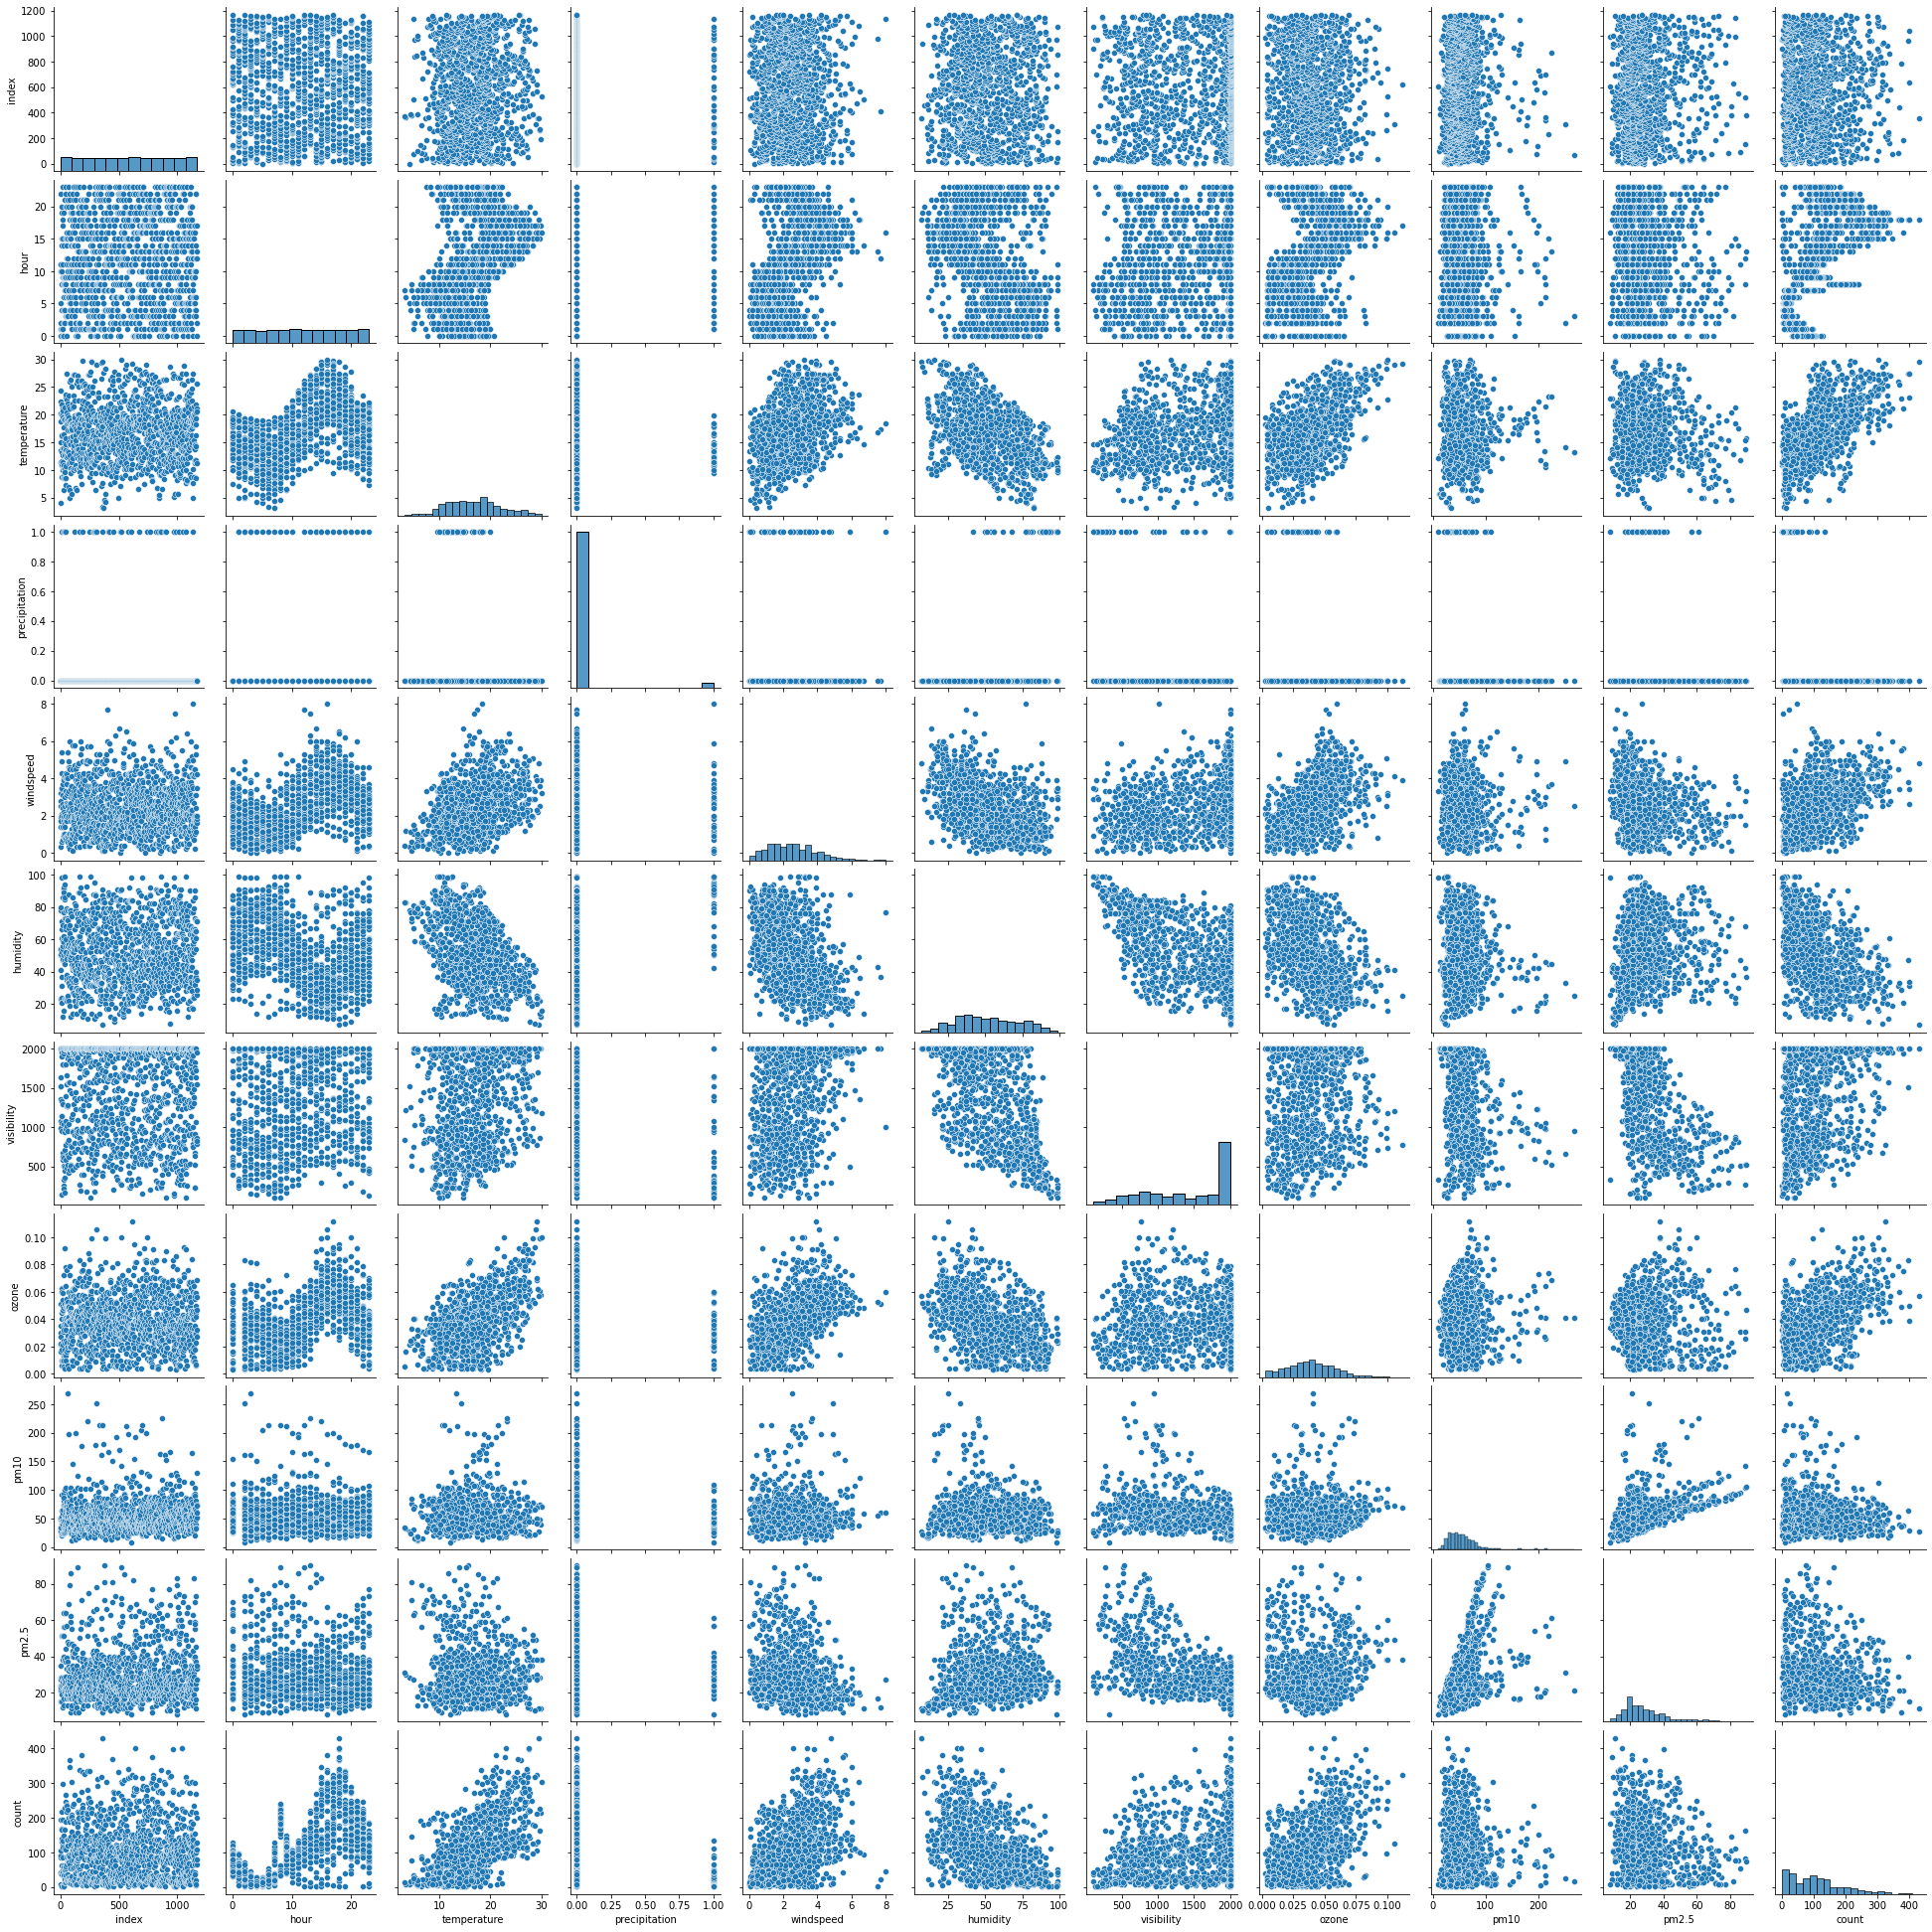

In [8]:
# 코드를 입력해 주세요
# train 데이터 프레임을 pairplot 시각화 하세요.
plt.figure(figsize=(10, 10))
sns.pairplot(train)
plt.show()

<Figure size 720x720 with 0 Axes>

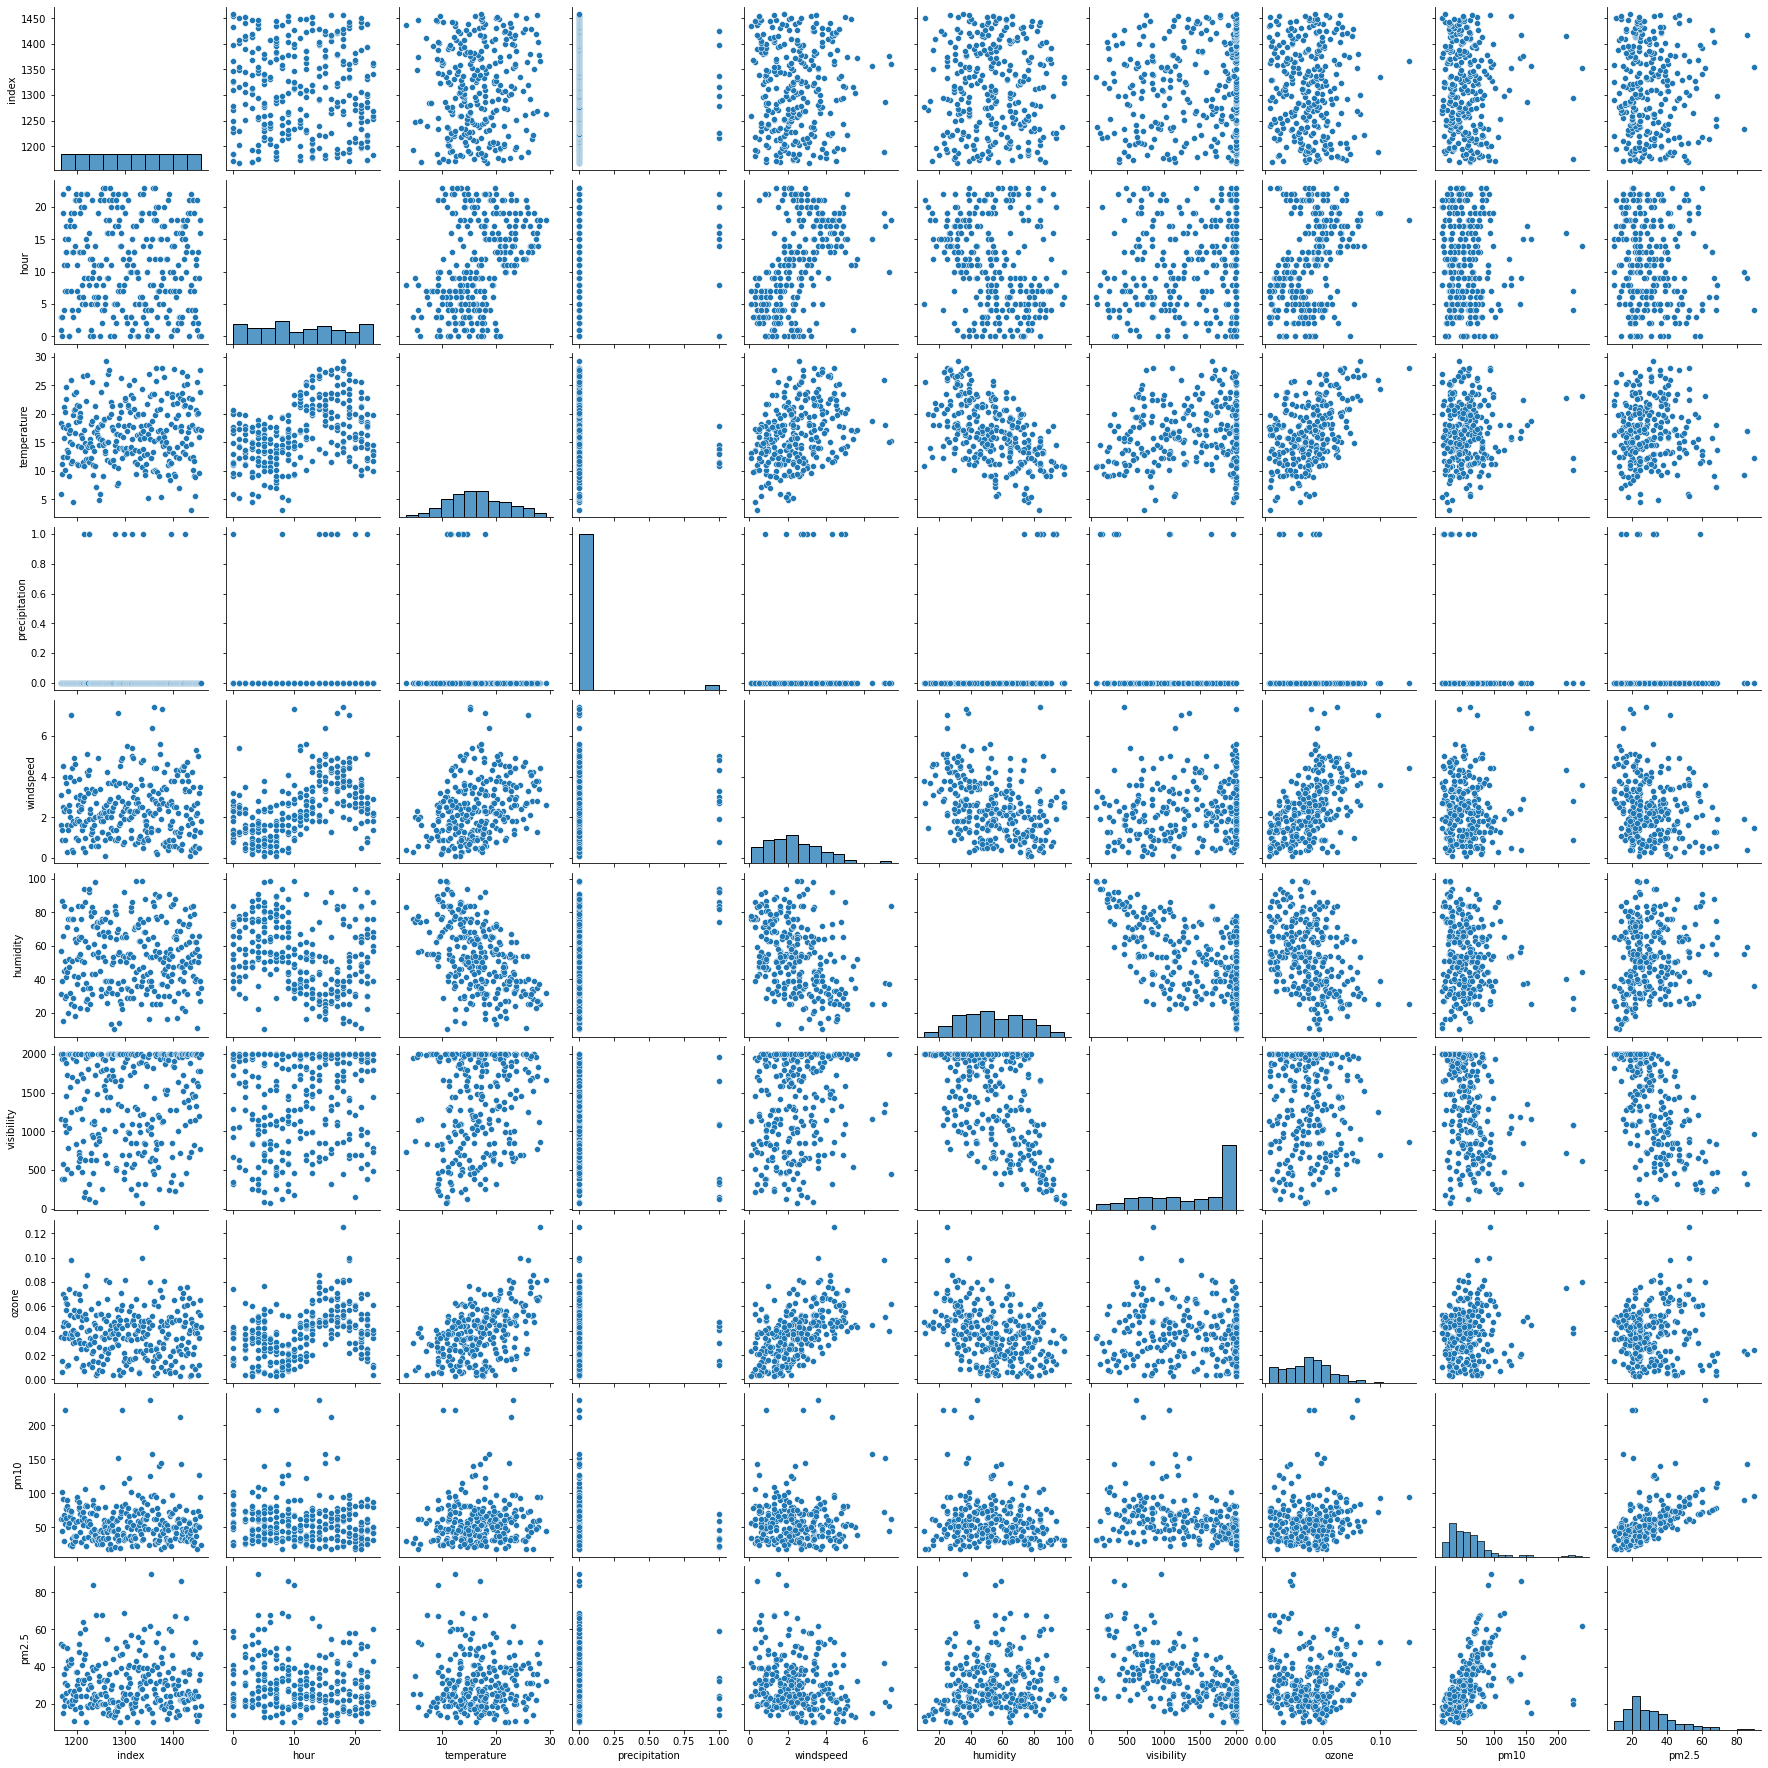

In [9]:
# 코드를 입력해 주세요
# test 데이터 프레임을 pairplot 시각화 하세요.
plt.figure(figsize=(10, 10))
sns.pairplot(test)
plt.show()

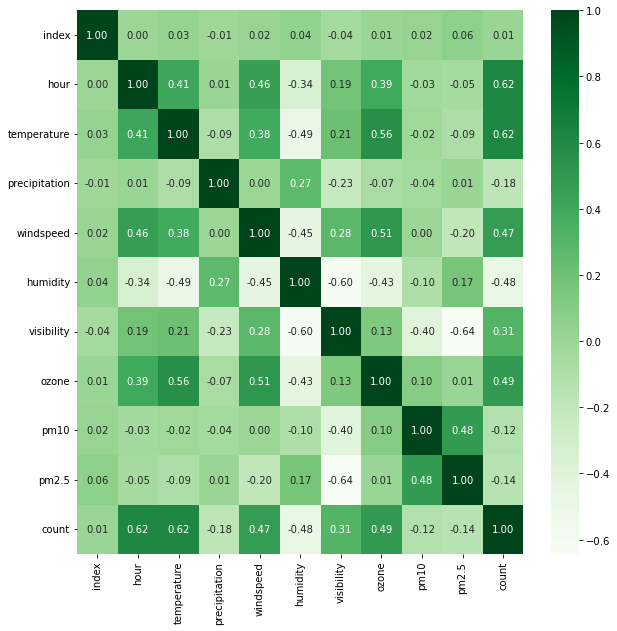

In [10]:
# 코드를 입력해 주세요
# train 데이터 프레임의 상관관계를 heatmap으로 시각화 하세요.
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

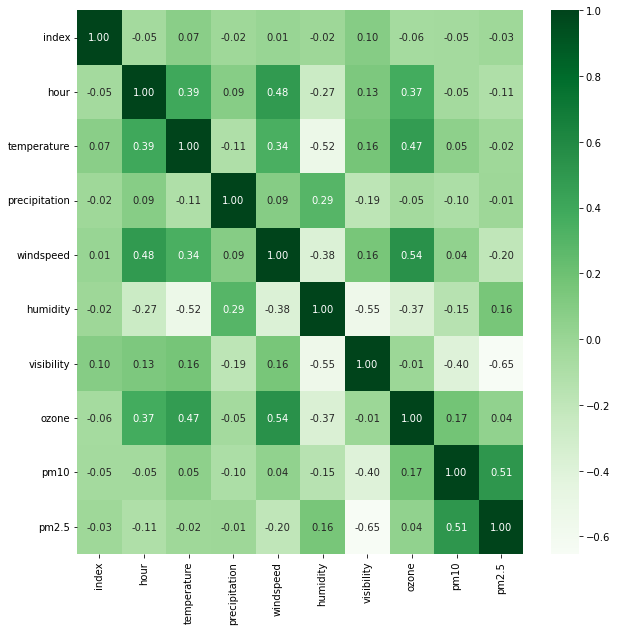

In [11]:
# 코드를 입력해 주세요
# test 데이터 프레임의 상관관계를 heatmap으로 시각화 하세요.
plt.figure(figsize=(10, 10))
sns.heatmap(test.corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

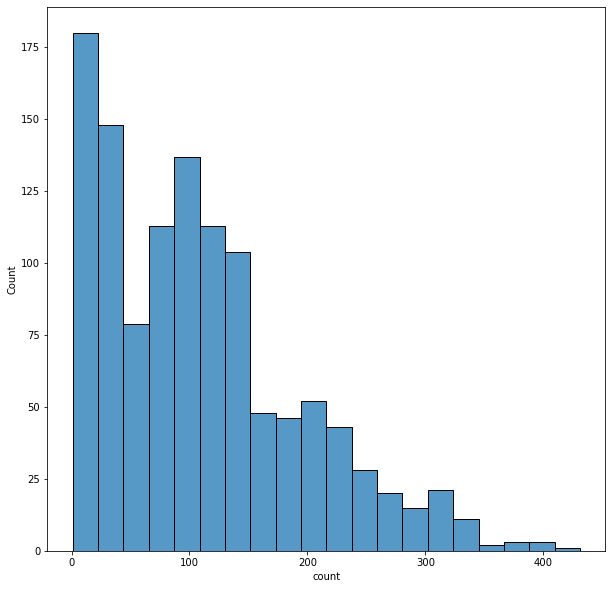

In [12]:
# 코드를 입력해 주세요
# train 데이터 프레임의 count 컬럼의 값을 histplot으로 시각화하세요.
plt.figure(figsize=(10, 10))
sns.histplot(train['count'])
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1167 non-null   int64  
 1   hour           1167 non-null   int64  
 2   temperature    1166 non-null   float64
 3   precipitation  1166 non-null   float64
 4   windspeed      1163 non-null   float64
 5   humidity       1166 non-null   float64
 6   visibility     1166 non-null   float64
 7   ozone          1101 non-null   float64
 8   pm10           1090 non-null   float64
 9   pm2.5          1069 non-null   float64
 10  count          1167 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 100.4 KB


In [14]:
# 코드를 입력해 주세요
# train 데이터와 test 데이터를 연결하여 all_data 변수에 저장하세요 (concat함수 사용)
all_data = pd.concat([train, test], sort=True)
all_data

,count,hour,humidity,index,ozone,pm10,pm2.5,precipitation,temperature,visibility,windspeed
0,8.0,5,78.0,0,0.021,28.0,28.0,0.0,4.0,1521.0,0.3
1,195.0,22,54.0,1,0.022,28.0,21.0,0.0,20.2,2000.0,2.8
2,90.0,11,41.0,2,0.035,48.0,27.0,0.0,24.4,1362.0,1.9
3,86.0,11,50.0,3,0.030,48.0,24.0,0.0,15.0,1517.0,1.4
4,39.0,2,80.0,4,0.027,34.0,15.0,0.0,13.6,1073.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...
287,NaN,0,66.0,1454,0.034,51.0,14.0,0.0,9.6,1957.0,3.2
288,NaN,9,54.0,1455,0.012,127.0,33.0,0.0,16.0,1192.0,0.5
289,NaN,16,27.0,1456,0.065,94.0,47.0,0.0,27.7,764.0,1.3
290,NaN,18,39.0,1457,0.053,66.0,36.0,0.0,23.8,1777.0,3.5


In [15]:
# 코드를 입력해 주세요
# all_data 데이터 프레임의 결측치를 0으로 치환하세요.
all_data = all_data.fillna(0)

In [16]:
all_data.isna().sum()

count            0
hour             0
humidity         0
index            0
ozone            0
pm10             0
pm2.5            0
precipitation    0
temperature      0
visibility       0
windspeed        0
dtype: int64

In [17]:
# 코드를 입력해 주세요
# all_data 프레임을 다시 train(:1167)과 test(1167:)로 분할하세요.
# 분할된 결과는 각각 tr과 te에 저장하세요.
tr = all_data[:len(train)] 
te = all_data[len(train):]
tr.shape, te.shape

((1167, 11), (292, 11))

In [18]:
tr

,count,hour,humidity,index,ozone,pm10,pm2.5,precipitation,temperature,visibility,windspeed
0,8.0,5,78.0,0,0.021,28.0,28.0,0.0,4.0,1521.0,0.3
1,195.0,22,54.0,1,0.022,28.0,21.0,0.0,20.2,2000.0,2.8
2,90.0,11,41.0,2,0.035,48.0,27.0,0.0,24.4,1362.0,1.9
3,86.0,11,50.0,3,0.030,48.0,24.0,0.0,15.0,1517.0,1.4
4,39.0,2,80.0,4,0.027,34.0,15.0,0.0,13.6,1073.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...
1162,108.0,13,26.0,1162,0.056,129.0,27.0,0.0,21.2,1542.0,4.2
1163,66.0,2,71.0,1163,0.027,74.0,34.0,0.0,11.3,791.0,1.6
1164,200.0,17,35.0,1164,0.069,51.0,27.0,0.0,25.7,1951.0,3.5
1165,129.0,12,29.0,1165,0.032,73.0,33.0,0.0,25.6,869.0,1.8


In [19]:
# 코드를 입력해 주세요
# tr 데이터 프레임에서 count 컬럼을 제외한 나머지를 X로 count 컬럼을 Y로 지정하여 데이터를 분할하세요.


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tr.drop('count', 1), tr['count'], test_size=0.2, random_state=123)

In [20]:
# 코드를 입력해 주세요
# LinearRegression 모델을 이용하여 모델링 하고 성능을 출력하세요.
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.6052340300313894, 0.5775455422311295)

In [21]:
# 코드를 입력해 주세요
# 학습된 모델을 이용하여 x_test 데이터에 대한 예측 결과를 y_pred에 저장하세요.
y_pred = model.predict(x_test)
y_pred

array([136.7403188 , 212.57539052,  24.80636386,  80.24524995,
         6.14676103,  46.05977328, 189.97095049,  78.19212576,
        26.98994692,  76.22854602,  44.99129125, 160.68225625,
        17.43649723, 176.30409512,  57.28910297, -12.47711717,
       223.31202882, 171.66274183,  92.73596401,  78.27624557,
        38.11142029, 173.3642161 , 128.5501948 ,  42.1532699 ,
       102.97725215, 193.95147196, 249.72141911, 121.81196973,
       134.10829705,   5.43259587, 168.12303306,  56.08699268,
        79.15497451,  -1.46292934, 130.61348492, 142.5517411 ,
       144.1683348 , 179.47298245,  64.23699815,  65.38023424,
        32.56843417, 195.25967585, 173.78480891,  39.78675224,
        76.88271469,  38.41543998, 181.48313564, 177.01591163,
       176.07328172,  39.8410297 ,  12.96065085,  56.54520108,
        22.44391712,  78.29686834, 114.81330778, 133.3818467 ,
       193.9002205 ,  38.225495  , 168.46917793, 172.27883394,
       218.92445727, 211.02862226,  61.66641196, -60.81

In [22]:
# 코드를 입력해 주세요
# y_pred의 값이 음수인 경우 0으로 대체하세요.
y_pred = np.where(y_pred < 0, 0, y_pred)
y_pred

array([136.7403188 , 212.57539052,  24.80636386,  80.24524995,
         6.14676103,  46.05977328, 189.97095049,  78.19212576,
        26.98994692,  76.22854602,  44.99129125, 160.68225625,
        17.43649723, 176.30409512,  57.28910297,   0.        ,
       223.31202882, 171.66274183,  92.73596401,  78.27624557,
        38.11142029, 173.3642161 , 128.5501948 ,  42.1532699 ,
       102.97725215, 193.95147196, 249.72141911, 121.81196973,
       134.10829705,   5.43259587, 168.12303306,  56.08699268,
        79.15497451,   0.        , 130.61348492, 142.5517411 ,
       144.1683348 , 179.47298245,  64.23699815,  65.38023424,
        32.56843417, 195.25967585, 173.78480891,  39.78675224,
        76.88271469,  38.41543998, 181.48313564, 177.01591163,
       176.07328172,  39.8410297 ,  12.96065085,  56.54520108,
        22.44391712,  78.29686834, 114.81330778, 133.3818467 ,
       193.9002205 ,  38.225495  , 168.46917793, 172.27883394,
       218.92445727, 211.02862226,  61.66641196,   0.  

In [23]:
# rmse 에러를 조회하세요.
from sklearn.metrics import mean_squared_log_error
rmse = mean_squared_log_error(y_test, y_pred)
rmse

1.0179112556044585

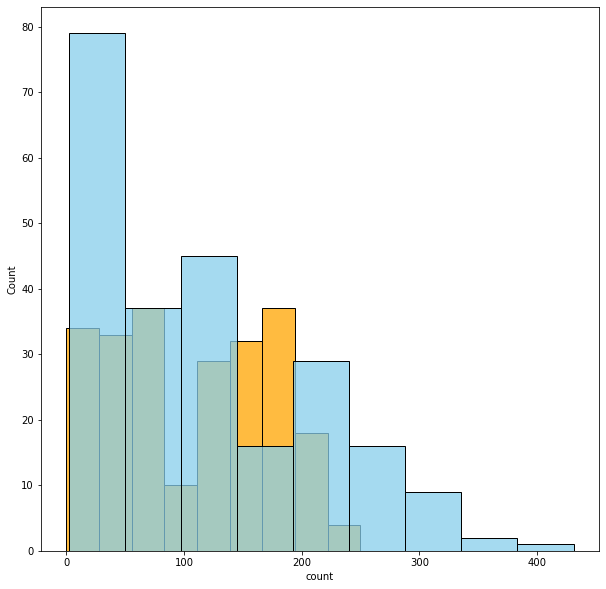

In [24]:
# 코드를 입력해 주세요
# y_pred와 y_test를 각각 histplot으로 시각화하세요,
plt.figure(figsize=(10, 10))
sns.histplot(y_pred, color='orange')
sns.histplot(y_test, color='skyblue')
plt.show()

In [25]:
# 코드를 입력해 주세요
# te 데이터에서 count 컬럼을 제거하고 학습된 모델을 이용하여 예측하세요.
prediction = model.predict(te.drop('count', 1))
prediction

array([ 89.24196575,   4.82028564,   4.0892786 ,   7.45201037,
       144.46115631, 157.29130253, 143.50229142,  57.86918734,
         2.69626476, 163.68763726, 141.96818001, 149.12604051,
       171.1189587 ,  65.80184292,  56.16253388, 153.21366706,
       123.27989112,  64.49338219,  17.525111  , 149.42288406,
       138.37956626, 240.03146029,  40.38931212,  55.67649849,
       111.65601693, 140.34084648,  -3.8188357 , 205.93382006,
       186.57425987, 153.71691935, 184.34928124, 154.70355191,
       193.42682652, 132.16649596,  46.1022053 ,  29.54146795,
        61.78210663, 130.28629231,  93.00199301, 167.95523256,
       161.69257806, 153.41043631, 139.37731988, 157.32782871,
        72.66552463,  35.88934362,  36.98736213, 187.20257971,
        86.50060512,  44.22830729,  29.35730378,  65.0223378 ,
       124.08009874, 186.19747321, 209.33965001, 162.63682791,
        86.08299185,  92.42184858,  51.72804556,  -8.35474278,
       108.83117285,  55.48837148,  81.49097736,  28.13

In [26]:
# 코드를 입력해 주세요
# 예측값이 음수인 경우 0으로 대체하세요.
prediction = np.where(prediction < 0, 0, prediction)
prediction

array([ 89.24196575,   4.82028564,   4.0892786 ,   7.45201037,
       144.46115631, 157.29130253, 143.50229142,  57.86918734,
         2.69626476, 163.68763726, 141.96818001, 149.12604051,
       171.1189587 ,  65.80184292,  56.16253388, 153.21366706,
       123.27989112,  64.49338219,  17.525111  , 149.42288406,
       138.37956626, 240.03146029,  40.38931212,  55.67649849,
       111.65601693, 140.34084648,   0.        , 205.93382006,
       186.57425987, 153.71691935, 184.34928124, 154.70355191,
       193.42682652, 132.16649596,  46.1022053 ,  29.54146795,
        61.78210663, 130.28629231,  93.00199301, 167.95523256,
       161.69257806, 153.41043631, 139.37731988, 157.32782871,
        72.66552463,  35.88934362,  36.98736213, 187.20257971,
        86.50060512,  44.22830729,  29.35730378,  65.0223378 ,
       124.08009874, 186.19747321, 209.33965001, 162.63682791,
        86.08299185,  92.42184858,  51.72804556,   0.        ,
       108.83117285,  55.48837148,  81.49097736,  28.13

## 결과 제출

### 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

- 전체 점수는 [평가시스템](http://manage.jaen.kr)에서 확인할 수 있습니다.
    - 프로젝트 > 따릉이 대여량 예측 > 리더보드 > 같은 반 리더보드

In [27]:
submission = pd.read_csv(os.path.join(DATA_DIR, 'submission.csv'))
submission['count'] = prediction
submission

,id,count
0,1167,89.241966
1,1168,4.820286
2,1169,4.089279
3,1170,7.452010
4,1171,144.461156
...,...,...
287,1454,22.034464
288,1455,56.848519
289,1456,192.012489
290,1457,193.169289


In [28]:
# 아래의 코드를 실행하여 결과를 생성하고 제출하세요.
cds.submit(submission)

파일을 저장하였습니다. 파일명: submission-14-15-36.csv
제출 실패 : 잘못된 정보입니다.


# 축하드립니다. 모델의 성능을 개선하여 더 좋은 점수를 획득해보세요!